# Import & Cleanup

In [1]:
import pandas as pd

In [2]:
df = pd.read_spss("./Data/private_landlord_survey/UKDA-8455-spss/spss/spss24/epls_2018_forarchive.sav")

In [3]:
df = df[["serial_2", # Unique Identifier
        "LLeth2cat", # LL ethnicity
        "Age4cat", # LL Age
        "ValperPrpA", # Avg mkt val per prop
        "MktValgrpA", # Mkt val all props
        "BTL", # Buy to let loan/other
        "LnperPrpA", # Avg loan per prop
        "LnValgrpA", # Total val all loans
        "LTVgrpA", # LTV market val
        "TmLLgrpB", # How long been LL
        "LLExp", # Length experience as LL
        "NumPrpgrp", # How many props
        "RtIncgrpa", # Gross rental inc
        "LLIncgrpA", # Total LL inc no rent
        "TotIncgrp", # Total LL inc
        "RtPrIncgrpA", # Rent as prop. inc
        "Port_size", # Portfolio size
        "LLEmpl01", # Emp. Status: FT
        "LLEmpl02", # Emp. Status: PT
        "LLEmpl03", # Emp. Status: Self-employed as LL
        "LLEmpl04", # Emp. Status: Self-employed
        "LLEmpl05", # Emp. Status: Retired
        "LLEmpl06", # Emp. Status: Company director
        "LLEmpl07", # Emp. Status: Student
        "LLEmpl08", # Emp. Status: FT carer
        "LLEmpl09", # Emp. Status: Unemployed
        "LLOrg1", # LL Org: National LLs Assc.
        "LLOrg2", # LL Org: Residential LL Assc.
        "LLOrg3", # LL Org: Other professional
        "LLOrg4", # LL Org: None
        "AgOrg1", # Rental Org: ARLA
        "AgOrg2", # Rental Org: NAEA
        "AgOrg3", # Rental Org: NALS
        "AgOrg4", # Rental Org: UKALA
        "AgOrg5", # Rental Org: Other
        "AgOrg6", # Rental Org: None
        "Regprop01", # Prop Region: East England
        "Regprop02", # Prop Region: East Midlands
        "Regprop03", # Prop Region: Inner London
        "Regprop04", # Prop Region: Outer London
        "Regprop05", # Prop Region: North East
        "Regprop06", # Prop Region: North West
        "Regprop07", # Prop Region: South East
        "Regprop08", # Prop Region: South West
        "Regprop09", # Prop Region: West Midlands
        "Regprop10", # Prop Region: Yorkshire/Humber
        "LLInfo01", # Where info: Letting Agent
        "LLInfo02", # Where info: LL membership ass. or org
        "LLInfo03", # Where info: Online landlord forums/websites
        "LLInfo04", # Where info: Gov't websites
        "LLInfo05", # Where info: Family/friends
        "LLInfo06", # Where info: Online media
        "LLInfo07", # Where info: TV
        "LLInfo08", # Where info: Radio
        "LLInfo09", # Where info: Newspapers
        "AgtuseA1", # Agent use: For letting svcs
        "AgtuseA2", # Agent use: For mgmt svcs
        "AgtuseA3", # Agent use: None
        "FutVac", # Next Vacancy will relet
        "FutProp", # Next two years, plan
        "FutRLv1", # LL leave/reduce: Financial
        "FutRLv2", # LL leave/reduce: Personal
        "FutRLv3", # LL leave/reduce: Legislative
        "FutRLv4", # LL leave/reduce: Other
        "FutRLv5", # LL leave/reduce: None
        "FutRLv6", # LL leave/reduce: Don't Know
        "FutInc1", # LL Increase/maintain: Financial
        "FutInc2", # LL Increase/maintain: Personal
        "FutInc3", # LL Increase/maintain: Legislative
        "FutInc4", # LL Increase/maintain: Other
        "FutInc5", # LL Increase/maintain: None
        "FutInc6", # LL Increase/maintain: Don't know
        "LLPmb1", # LL Serious problems: Financial
        "LLPmb2", # LL Serious problems: Legislative
        "LLPmb3", # LL Serious problems: Tenant behaviour
        "LLPmb4", # LL Serious problems: Other
        "LLPmb5", # LL Serious problems: None
        "Lntyp1", # Current loan: B2L mort
        "Lntyp2", # Current loan: Commercial loan
        "Lntyp3", # Current loan: Family/friends
        "Lntyp4", # Current loan: No debt
        "Lntyp5", # Current loan: Other
        "TaxB201", # Awareness: Stamp duty increase
        "TaxB202", # Awareness: Reduced tax relief
        "TaxB203", # Awareness: Reduced CG tax non-prop
        "TaxB204", # Awareness: Change wear/tear allow
        "TaxB205", # Awareness: Change minimum rent B2L mort
        "TaxB206", # Awareness: Letting agent fee ban
        "TaxB207", # Awareness: Tax treatment foreign prop own
        "TaxB208", # Awareness: None
        "TaxB301", # As above but understanding
        "TaxB302",
        "TaxB303",
        "TaxB304",
        "TaxB305",
        "TaxB306",
        "TaxB307",
        "EPCEFG", # Any props. w/ EPC rating E, F or G
        "EPCE", # Awareness: EPC requirements
        "LetReq03"] # Requirement: EPC Certificate]
]

df["serial_2"] = df["serial_2"].astype("int")

# Total Market

Finding reasons behind reducing property investment:

In [169]:
reducing = df[["FutRLv1",
              "FutRLv2", 
              "FutRLv3", 
              "FutRLv4", 
              "FutRLv5"]]

reducing.columns = [
    "Financial",
    "Personal",
    "Legislative",
    "Other",
    "None"
]

reducing = reducing.dropna()
df1 = reducing.melt(var_name='columns', value_name='index')

crosstab = pd.crosstab(index=df1['index'], columns=df1['columns'])
f = lambda a : a / len(reducing) * 100
crosstab.applymap(f)[1:]

columns,Financial,Legislative,None,Other,Personal
index,,,,,
Yes,25.950783,65.995526,0.671141,18.493661,37.43475


Sources of information

In [168]:
info_df = df[
    ["LLInfo01", # Where info: Letting Agent
     "LLInfo02", # Where info: LL membership ass. or org
     "LLInfo03", # Where info: Online landlord forums/websites
     "LLInfo04", # Where info: Gov't websites
     "LLInfo05", # Where info: Family/friends
     "LLInfo06", # Where info: Online media
     "LLInfo07", # Where info: TV
     "LLInfo08", # Where info: Radio
     "LLInfo09"] # Where info: Newspapers
]

info_df.columns = [
    "Letting Agent",
    "LL Membership Assoc.",
    "Online LL forums",
    "Gov't websites",
    "Family/Friends",
    "Online Media",
    "Television",
    "Radio",
    "Newspapers"
]

info_df = info_df.dropna()
info_len = len(info_df.index)
info_df = info_df.melt(var_name='columns', value_name='index')
info_xt = pd.crosstab(index=info_df['index'], columns=info_df['columns'])
f = lambda a : a / info_len
info_xt = info_xt.applymap(f)
info_xt[1:]

columns,Family/Friends,Gov't websites,LL Membership Assoc.,Letting Agent,Newspapers,Online LL forums,Online Media,Radio,Television
index,,,,,,,,,
Yes,0.16938,0.628678,0.324571,0.306497,0.229425,0.425093,0.335922,0.100373,0.142345


<AxesSubplot:xlabel='index'>

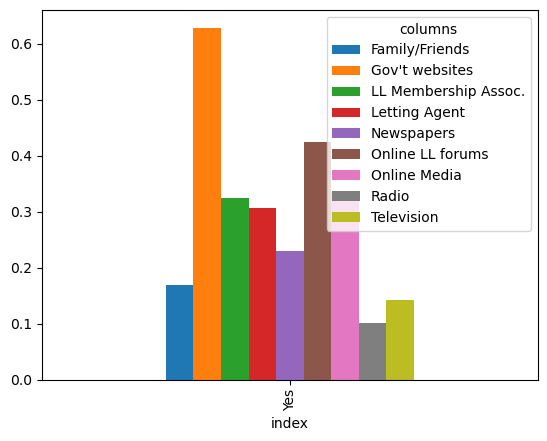

In [146]:
info_xt[1:].plot(kind="bar", use_index=True)

How many landlords were completely unaware of EPCE reqs?

In [72]:
len(df[df["EPCE"]=="I was not aware of this at all"].index)/len(df[df["EPCE"].notna()].index)

0.3010767343600927

In [212]:
df_age = df["Age4cat"].value_counts().to_frame()
f = lambda a : round(a / len(df[df["Age4cat"].notna()].index) * 100, 2)
df_age.applymap(f)

,Age4cat
45 to 64,58.32
65 and over,28.58
35-44,10.58
18-34,2.53


# Target Market

Defining target market as:
- Has properties rated E, F, or G
- Has less than 10 properties

In [135]:
tgt_mkt = df[df["EPCEFG"] == "Yes"]
tgt_mkt = tgt_mkt[(tgt_mkt["NumPrpgrp"].isin(['1 only', '2 to 4', '5 to 9']))]

Getting stats for:
```py
"LLeth2cat", # LL ethnicity
"Age4cat", # LL Age
"ValperPrpA", # Avg mkt val per prop
"MktValgrpA", # Mkt val all props
"BTL", # Buy to let loan/other
"LnperPrpA", # Avg loan per prop
"LnValgrpA", # Total val all loans
"LTVgrpA", # LTV market val
"TmLLgrpB", # How long been LL
"LLExp", # Length experience as LL
"NumPrpgrp", # How many props
"RtIncgrpa", # Gross rental inc
"LLIncgrpA", # Total LL inc no rent
"TotIncgrp", # Total LL inc
"RtPrIncgrpA" # Rent as prop. inc
```

In [4]:
def get_stats(df: pd.DataFrame, col: str, percent:bool = True) -> pd.DataFrame:
    df_stats = df[col].value_counts().to_frame()
    if percent == True:
        f = lambda a : round(a / len(df[df[col].notna()].index), 4)
        df_stats = df_stats.applymap(f)
    return df_stats

## Basic Stats

How much of the total market of LLs are we looking at?

Going to exclude `na` vals from the total here:

In [110]:
tgt_len = len(tgt_mkt.index)
df_len = len(df[(df["EPCEFG"].notna()) & (df["NumPrpgrp"].notna())].index)

print(f" Target market: {tgt_len} \n Total market: {df_len} \n Percentage of total market: {round((tgt_len/df_len)*100,2)}%")

 Target market: 1103 
 Total market: 6150 
 Percentage of total market: 17.93%


Not including the property count, we could increase this to 29% of the total market:

In [145]:
len(df[df["EPCEFG"]=="Yes"].index)/len(df[df["EPCEFG"].notna()].index)

0.2885348583877996

How many of these landlords unaware of EPC regs?

In [71]:
len(tgt_mkt[tgt_mkt["EPCE"]=="I was not aware of this at all"].index)/len(tgt_mkt[tgt_mkt["EPCE"].notna()].index)

0.323956442831216

In [55]:
get_stats(tgt_mkt, "NumPrpgrp")

,count
NumPrpgrp,
2 to 4,0.4705
5 to 9,0.2874
1 only,0.2421
10 to 24,0.0000
25 to 100,0.0000
more than 100,0.0000


In [56]:
get_stats(tgt_mkt, "LLeth2cat")

,count
LLeth2cat,
White,0.8936
Other,0.1064


In [57]:
get_stats(tgt_mkt, "Age4cat")

,count
Age4cat,
45 to 64,0.5755
65 and over,0.3111
35-44,0.0924
18-34,0.0209


In [146]:
get_stats(tgt_mkt, "NumPrpgrp")

,count
NumPrpgrp,
2 to 4,0.4705
5 to 9,0.2874
1 only,0.2421
10 to 24,0.0000
25 to 100,0.0000
more than 100,0.0000


In [58]:
get_stats(tgt_mkt, "ValperPrpA")

,count
ValperPrpA,
"£200,000 to £499,999",0.3817
"£100,000 to £129,999",0.1605
"£150,000 to £179,999",0.1224
"£500,000 and over",0.1132
"£130,000 to £149,999",0.0607
"£50,000 to £79,999",0.0514
"£180,000 to £199,999",0.0463
"£80,000 to £99,999",0.0463
"up to £49,999",0.0175


In [59]:
df_stats = get_stats(tgt_mkt, "MktValgrpA")

,count
MktValgrpA,
"£500,000 to £999,999",0.3035
"£200,000 to £499,999",0.2840
"£1,000,000 to £1,999,999",0.1759
"£100,000 to £199,999",0.1142
"£2,000,000 to £2,999,999",0.0535
"less than £100,000",0.0329
"£3,000,000 to £3,999,999",0.0144
"£6,000,000 or more",0.0123
"£4,000,000 to £4,999,999",0.0062


Rough estimate of avg portfolio size:

In [69]:
df_stats = get_stats(tgt_mkt, "MktValgrpA")
df_stats["medmktval"] = [
    (500000+999999)/2,
    (200000+499999)/2,
    (1000000+1999999)/2,
    (100000+199999)/2,
    (2000000+2999999)/2,
    (100000)/2,
    (3000000+3999999)/2,
    6000000,
    (4000000+4999999)/2,
    (5000000+5999999)/2
]

pd.DataFrame(df_stats["count"].multiply(df_stats["medmktval"])).sum()

0    912549.5226
dtype: float64

How much debt do these folks have?

For LTVgrpA, I can likely get near averages.

In [136]:
# Add 0% LTV category if responded "Yes" to "No debt"
tgt_mkt["LTVgrpA"] = tgt_mkt.LTVgrpA.cat.add_categories(['0%'])
tgt_mkt.loc[tgt_mkt["Lntyp4"] == "Yes", "LTVgrpA"] = "0%"

In [137]:
df_stats = get_stats(tgt_mkt, "LTVgrpA")
df_stats

,count
LTVgrpA,
0%,0.3967
50 to 59%,0.1092
60 to 69%,0.0867
40 to 49%,0.0721
30 to 39%,0.0682
70 to 79%,0.0585
10 to 19%,0.0575
20 to 29%,0.0556
1 to 9%,0.0478


In [138]:
df_stats["med_ltv"] = [
    0,
    (.5+.59)/2,
    (.6+.69)/2,
    (.3+.39)/2,
    (.4+.49)/2,
    (.01+.09)/2,
    (.7+.79)/2,
    (.2+.29)/2,
    (.1+.19)/2,
    1,
    (.8+.89)/2,
    (.9+.99)/2,
]
pd.DataFrame(df_stats["count"].multiply(df_stats["med_ltv"])).sum()

0    0.281478
dtype: float64

Find for LLs who have debt

In [144]:
tgt_debt = tgt_mkt[tgt_mkt["Lntyp4"]=='No']
df_stats = get_stats(tgt_debt, "LTVgrpA")
df_stats["med_ltv"] = [
    (.5+.59)/2,
    (.6+.69)/2,
    (.4+.49)/2,
    (.3+.39)/2,
    (.7+.79)/2,
    (.1+.19)/2,
    (.2+.29)/2,
    (.01+.09)/2,
    1,
    (.8+.89)/2,
    (.9+.99)/2,
    0
]
pd.DataFrame(df_stats["count"].multiply(df_stats["med_ltv"])).sum()

0    0.469864
dtype: float64

## Market Value

In [152]:
mkt_val = tgt_mkt[["serial_2", # Unique Identifier
                   "ValperPrpA", # Avg mkt val per prop
                   "MktValgrpA", # Mkt val all props
                   #"LnperPrpA", # Avg loan per prop
                   #"LnValgrpA", # Total val all loans
                   #"LTVgrpA", # LTV market val
                   "NumPrpgrp", # How many props
                   #"RtIncgrpa", # Gross rental inc
                   #"LLIncgrpA", # Total LL inc no rent
                   #"TotIncgrp", # Total LL inc
                   #"RtPrIncgrpA", # Rent as prop. inc
]]
mkt_val.head(5)

,serial_2,ValperPrpA,MktValgrpA,NumPrpgrp
0,101638,"£130,000 to £149,999","£100,000 to £199,999",1 only
7,102965,"£200,000 to £499,999","£200,000 to £499,999",1 only
10,103689,"£150,000 to £179,999","£100,000 to £199,999",1 only
12,107804,"£500,000 and over","£1,000,000 to £1,999,999",2 to 4
15,106253,"£100,000 to £129,999","£100,000 to £199,999",1 only


In [171]:
for i in mkt_val["ValperPrpA"].unique():
    i = str(i)
    # i = i.replace("up to ", "")
    # i = i.replace(" and over", "")
    i = i.replace("£", "")
    i = i.replace(",", "")
    i = i.split(" to ")
    print(i)

['130000', '149999']
['200000', '499999']
['150000', '179999']
['500000 and over']
['100000', '129999']
['50000', '79999']
['80000', '99999']
['nan']
['180000', '199999']
['up', '49999']
